### 기대 수명 예측
이 데이터 세트에는 기대 수명에 영향을 미치는 요인을 추적하기 위해 세계보건기구(WHO)와 UN에서 수집한 정보가 포함되어 있다.

Life expectancy(기대 수명)에 대한 예측을 수행하는 모델을 생성해보자.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### 결측치가 전체 데이터의 일부인 일부 column에 대해서는 해당 컬럼의 평균값으로 대체

결측치의 행을 날린다거나, 해당행을 머신러닝 기법을 사용하는 방법도 있음

In [6]:
df['Life expectancy '].mean()

69.22493169398908

In [7]:
df['Life expectancy ']=df['Life expectancy '].fillna(value=df['Life expectancy '].mean())

df['Adult Mortality']=df['Adult Mortality'].fillna(value=df['Adult Mortality'].mean())

In [8]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### 상관관계 확인

/var/folders/53/ypf7t9_s0nx0d635vk2z2_lc0000gn/T/ipykernel_3840/237162020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot=True,


<Axes: >

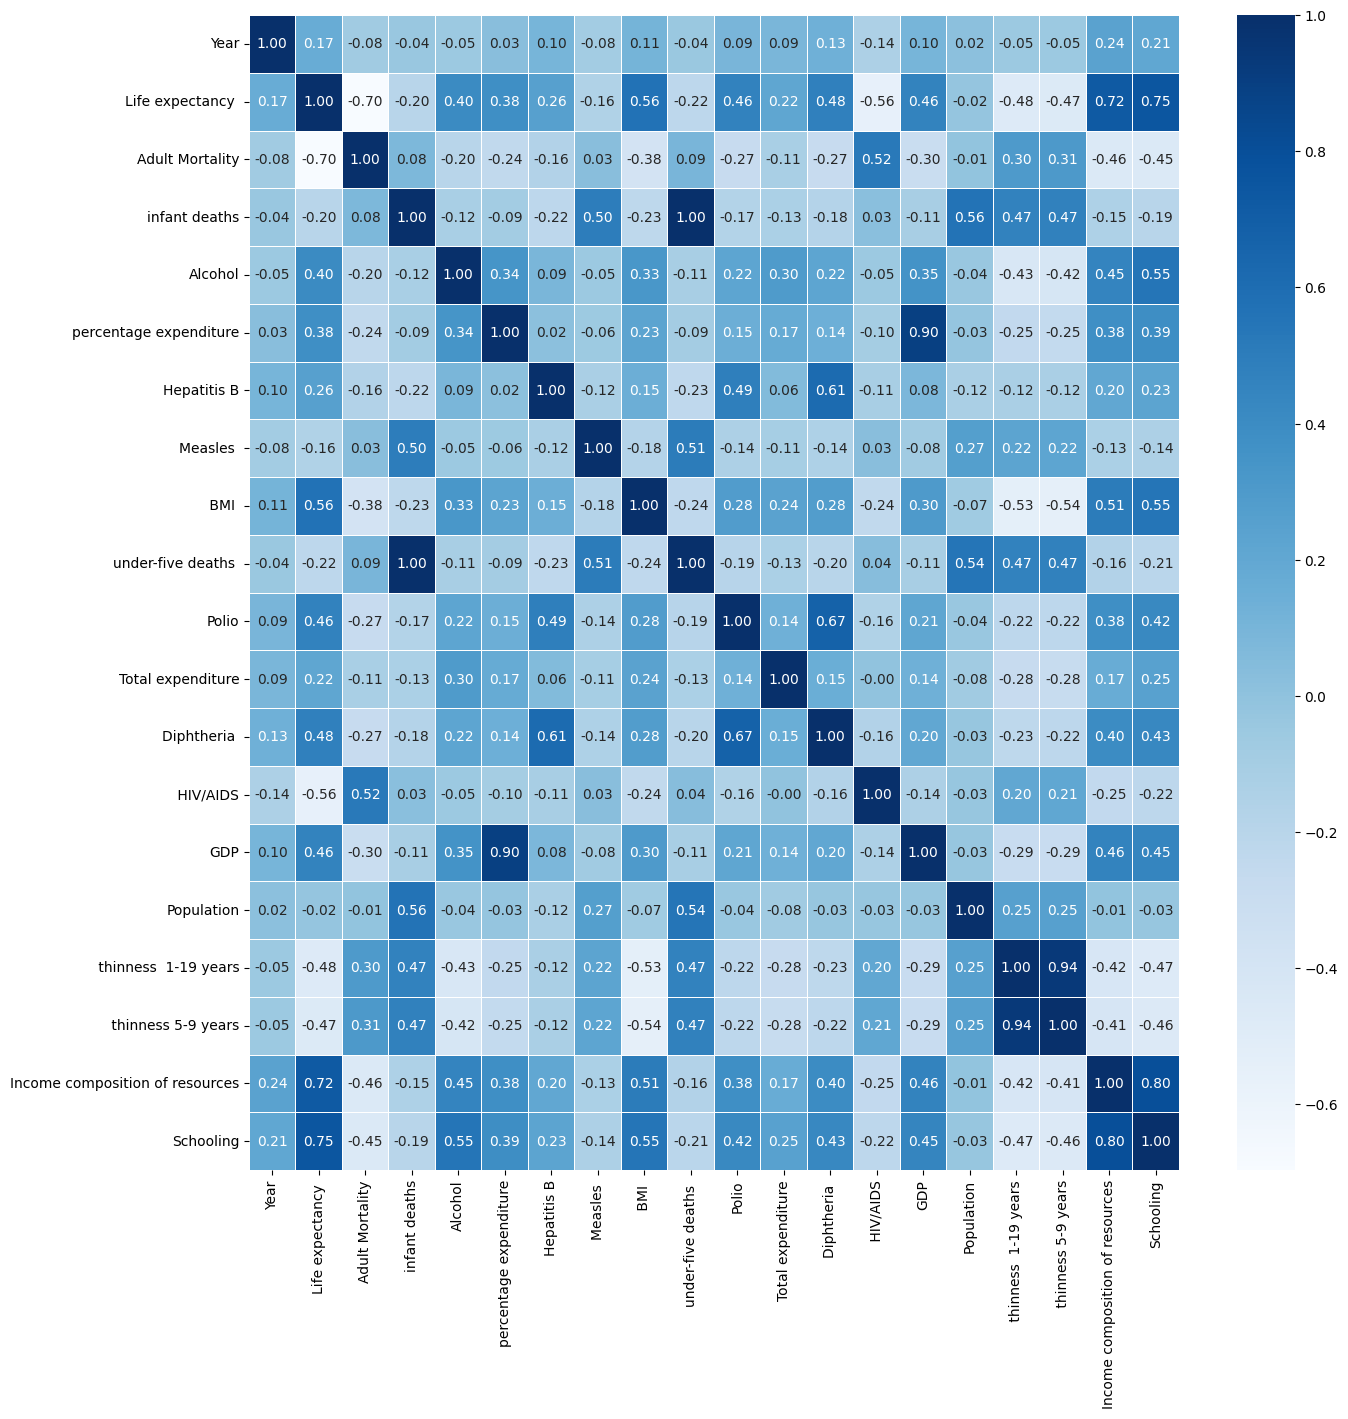

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 알코올의 결측치는 다음과 같은 방식으로 처리해봄
y축에서 알코올 컬럼을 찾고, 해당 행에서 알코올과 가장 연관도가 높은 컬럼은 Schooling  
따라서 해당 컬럼을 활용하여 결측치를 채워봄

<Axes: xlabel='Schooling', ylabel='Alcohol'>

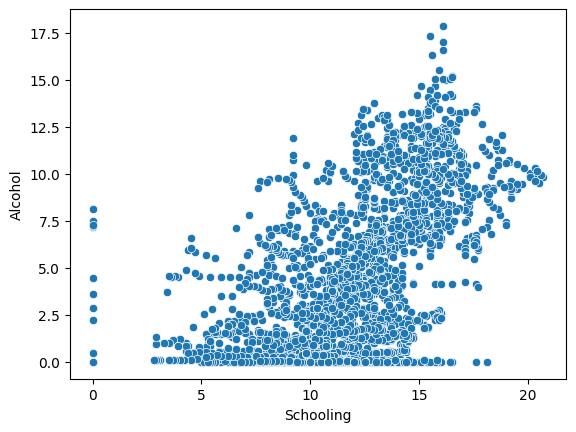

In [10]:
sns.scatterplot(x=df['Schooling'],y=df['Alcohol'])

### 위에서 시각화한 지표를 바탕으로 구간별로 적당한 평균값을 주도록 함수화

In [11]:
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
df['Alcohol']=df[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)
df['Alcohol']=df['Alcohol'].fillna(value=df['Alcohol'].mean())

In [12]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### 결측치를 채운 알코올 컬럼의 데이터 분포 시각화

/var/folders/53/ypf7t9_s0nx0d635vk2z2_lc0000gn/T/ipykernel_3840/3372989474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcohol'])


<Axes: xlabel='Alcohol', ylabel='Density'>

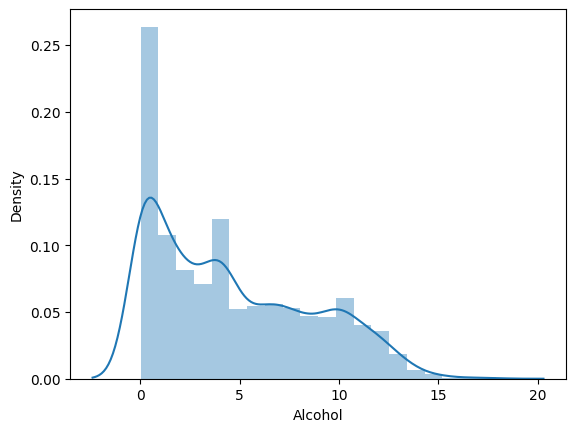

In [13]:
sns.distplot(df['Alcohol'])

### Polio 컬럼도 마찬가지로 전처리

히트맵에서 Polio와 가장 연관성이 높은 Life expectancy 를 시각화 한후
거기서 얻은 분포를 기반으로 결측치를 채우는 함수 작성

<Axes: xlabel='Life expectancy ', ylabel='Polio'>

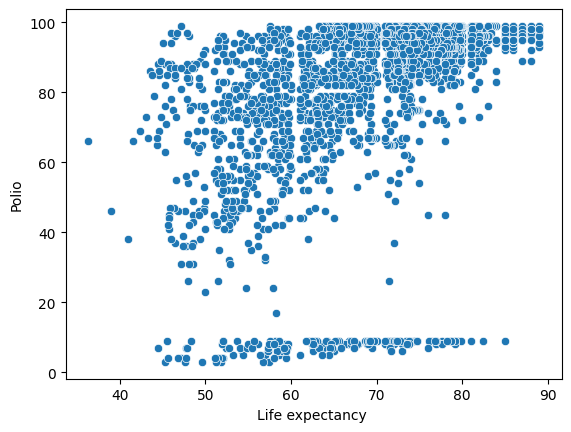

In [14]:
sns.scatterplot(x=df['Life expectancy '],y=df['Polio'])

In [15]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
df['Polio']=df[['Polio','Life expectancy ']].apply(impute_polio,axis=1)

In [16]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### 결측치가 100이하인 나머지 컬럼들은 모두 동일한 방식으로 처리

<Axes: xlabel='Polio', ylabel='Diphtheria '>

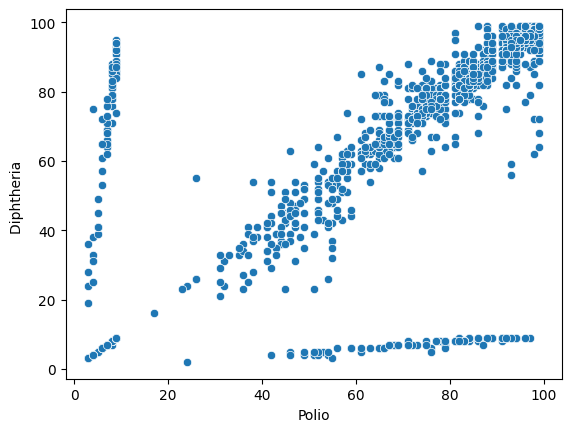

In [17]:
sns.scatterplot(x=df['Polio'],y=df['Diphtheria '])

In [18]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
df['Diphtheria ']=df[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

<Axes: xlabel='Life expectancy ', ylabel=' BMI '>

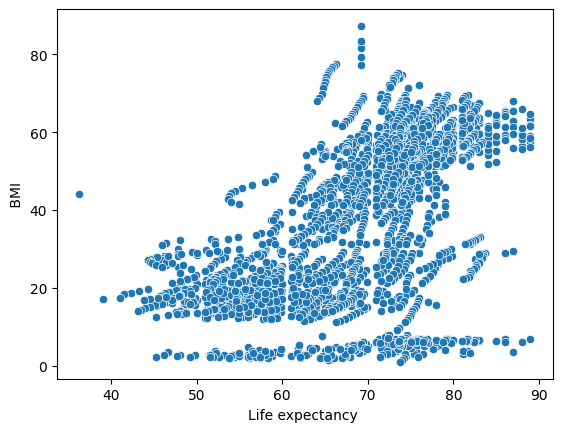

In [19]:
sns.scatterplot(x=df['Life expectancy '],y=df[' BMI '])

In [20]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
df[' BMI ']=df[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

<Axes: xlabel=' BMI ', ylabel=' thinness  1-19 years'>

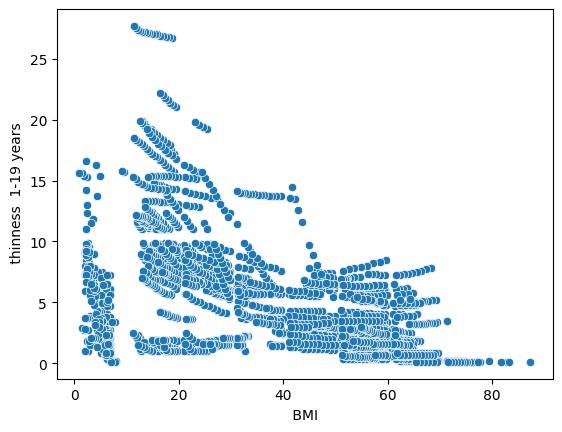

In [21]:
sns.scatterplot(x=df[' BMI '],y=df[' thinness  1-19 years'])

In [22]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
df[' thinness  1-19 years']=df[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

<Axes: xlabel=' BMI ', ylabel=' thinness 5-9 years'>

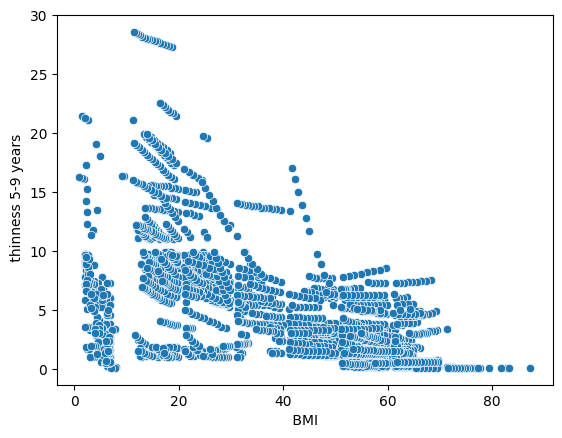

In [23]:
sns.scatterplot(x=df[' BMI '],y=df[' thinness 5-9 years'])

In [24]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
df[' thinness 5-9 years']=df[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

In [25]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                           0
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    167
Schooling                          163
dtype: int64

### 결측치가 100개 이상인 컬럼의 행은 제거

In [26]:
df.dropna(subset=['Hepatitis B', 'Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling'], axis=0, inplace=True)

In [27]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### 자료형 확인

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1660 non-null   object 
 1   Year                             1660 non-null   int64  
 2   Status                           1660 non-null   object 
 3   Life expectancy                  1660 non-null   float64
 4   Adult Mortality                  1660 non-null   float64
 5   infant deaths                    1660 non-null   int64  
 6   Alcohol                          1660 non-null   float64
 7   percentage expenditure           1660 non-null   float64
 8   Hepatitis B                      1660 non-null   float64
 9   Measles                          1660 non-null   int64  
 10   BMI                             1660 non-null   float64
 11  under-five deaths                1660 non-null   int64  
 12  Polio               

### object인 컬럼들을 뉴메릭한 타입으로 변환

In [29]:
Country_dummy=pd.get_dummies(df['Country'])
status_dummy=pd.get_dummies(df['Status'])

In [30]:
df.drop(['Country','Status'],inplace=True,axis=1)

In [31]:
df=pd.concat([df,Country_dummy,status_dummy],axis=1)

### 최종 확인

In [32]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Turkmenistan,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Zambia,Zimbabwe,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,0,0,0,0,0,0,0,1,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,0,0,0,0,0,0,0,1,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,0,0,0,0,0,0,0,1,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,0,0,0,0,0,0,0,1,0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 0 to 2937
Columns: 157 entries, Year to Developing
dtypes: float64(16), int64(4), uint8(137)
memory usage: 494.4 KB


In [34]:
df.isna().sum()

Year                0
Life expectancy     0
Adult Mortality     0
infant deaths       0
Alcohol             0
                   ..
Vanuatu             0
Zambia              0
Zimbabwe            0
Developed           0
Developing          0
Length: 157, dtype: int64

### 모델링

In [35]:
X=df.drop('Life expectancy ',axis=1)
y=df['Life expectancy ']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
model= LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
r_square = model.score(X_test,y_test)
print(r_square)

0.9532835081555051
